In [1]:
#/usr/bin/python3.8
# Use jupyter notebook with python 3+ 
"""
Auth : Al Sabawi
Date: Mar 14, 2020
Last Update : Mar 19, 2020
"""
# Need the following libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Set the region aas spelled in the Johns Hupkins Center file below
region = 'US' #'Kuwait'  'United Kingdom' 'China' 'Italy' 'France' 'Canada' 'Australia'

## Data Source

#### Johns Hupkins Whiting School of Engineering COVID-19 Data Repository at https://github.com/CSSEGISandData

## Download the data to your computer daily

In [2]:
## Download the latest data file from:
## https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
## File name "time_series_19-covid-Confirmed.csv"  for all confirmed cases in the world by region
## *** DOWNLOAD to local directory ***
confirmed_filename = './time_series_19-covid-Confirmed.csv'
recovered_filename = './time_series_19-covid-Recovered.csv'
deaths_filename = './time_series_19-covid-Deaths.csv'

df_confirmed = pd.read_csv(confirmed_filename)
df_recovered = pd.read_csv(recovered_filename)
df_deaths = pd.read_csv(deaths_filename)

## Separate the dates to use as an index later
dates = df_confirmed.columns[4:]

## Filter for a specific region data only 
usa = df_confirmed[df_confirmed['Country/Region'].values == region].copy(deep=True)
usa_recovered = df_recovered[df_recovered['Country/Region'].values == region].copy(deep=True)
usa_deaths = df_deaths[df_deaths['Country/Region'].values == region].copy(deep=True)

usad = usa[dates].copy(deep=True)
last_date = usa[dates].columns[-1]

## Put the US data into a DataFrame Series and give it a name
colname = 'Confirmed '+region+' COVID-19 Cases'
colname_recovered = 'Recovered in '+region+' from COVID-19 Cases'
colname_deaths = 'Deaths in '+region+' from COVID-19 Cases'

us_df_cumulative = pd.DataFrame(usa[dates].sum(), columns=[colname])
us_df_cumulative['dates'] = dates
us_df_recovered_cum = pd.DataFrame(usa_recovered[dates].sum(), columns=[colname_recovered])
us_df_deaths_cum = pd.DataFrame(usa_deaths[dates].sum(), columns=[colname_deaths])

# Check: These 2 following prints should give the same number on same Last Dates data is collected
#print(last_date, usad[last_date].sum())
#print(us_df_cumulative[-1:])

## Plot the confirmed COVID-19 Cases

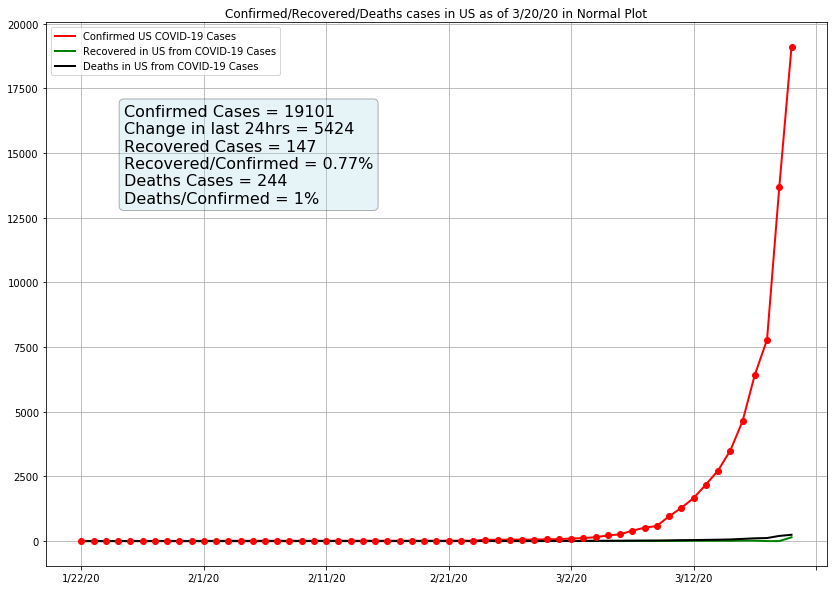

In [3]:
## Plot the raw data (not logarithmic)
fig, ax = plt.subplots(figsize=(14,10))
#us_df = pd.DataFrame(usa[dates].sum(), columns=[colname])

us_df_cumulative.plot(ax=ax,c='red', lw=2,title='Confirmed/Recovered/Deaths cases in '+region+' as of '+str(us_df_cumulative.index[-1])+' in Normal Plot')
us_df_recovered_cum.plot(ax=ax,c='green', lw=2)
us_df_deaths_cum.plot(ax=ax,c='black', lw=2)

ax.plot(us_df_cumulative[colname],'o',c='red',lw=8)

last_conf = us_df_cumulative[colname][-1:][0]
last_recov = us_df_recovered_cum[colname_recovered][-1:][0]
last_death = us_df_deaths_cum[colname_deaths][-1:][0]
last_conf_change = us_df_cumulative[colname][-1:][0] - us_df_cumulative[colname][-2:][0]

textstr = '\n'.join((
        r'Confirmed Cases = %.0f' % (last_conf, ),
        r'Change in last 24hrs = %.0f' % (last_conf_change,),
        r'Recovered Cases = %.0f' % (last_recov, ),
        r'Recovered/Confirmed = %.2f%%' % (last_recov*100/last_conf, ),
        r'Deaths Cases = %.0f' % (last_death, ),
        r'Deaths/Confirmed = %.0f%%' % (last_death*100/last_conf, )))

props = dict(boxstyle='round', facecolor='lightblue', alpha=0.3)
ax.text(0.1, 0.85, textstr, transform=ax.transAxes, fontsize=16,fontfamily='sans-serif',
        verticalalignment='top', bbox=props)

ax.grid(True,which="both")

## Plot Logarithmically

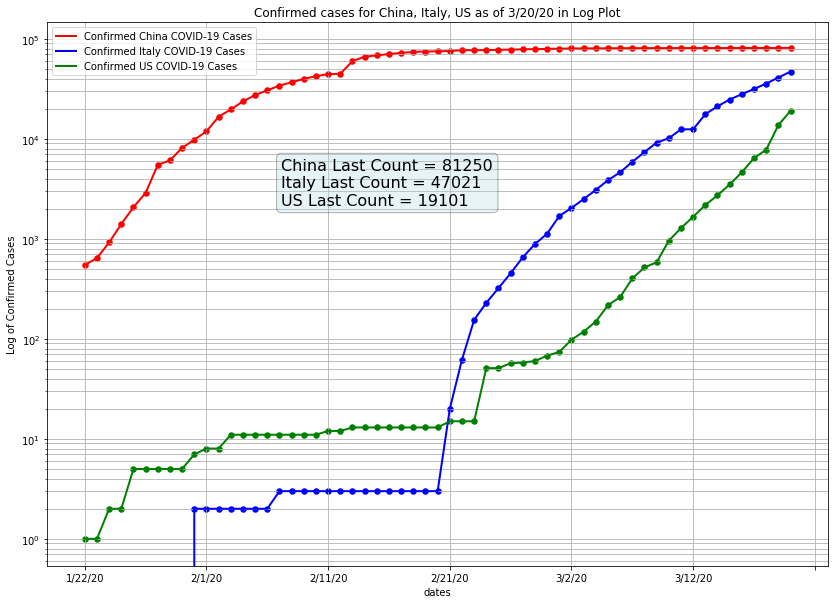

In [95]:
## Plot the raw data (logarithmic)
regions_list = ['China','Italy','US']
colors = ['red','blue','green']    
list2string = ', '.join([str(elem) for elem in regions_list])
title = 'Confirmed cases for '+ list2string +' as of '+ str(us_df_cumulative.index[-1]) +' in Log Plot'
text_strings = []
fig, ax = plt.subplots(figsize=(14,10))
#fig.suptitle(title,size=24)
i = 0
for r in regions_list:
    colname = 'Confirmed '+r+' COVID-19 Cases'
    
    df1 = df_confirmed[df_confirmed['Country/Region'].values == r].copy(deep=True)

    df2 = pd.DataFrame(df1[dates].sum(), columns=[colname])
    df2['dates'] = dates  
    df2[colname].plot(ax=ax,logy=True,c=colors[i], lw=2, title = title)
    df2.plot.scatter(ax=ax,logy=True,c=colors[i],x='dates',y=colname,lw=2)
    text_strings.append(regions_list[i] + ' Last Count = ' + str(int(df2[colname][-1:][0])))
    i = i +1

textstr = '\n'.join([str(elem) for elem in text_strings])
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.3)
ax.text(0.3, 0.75, textstr, transform=ax.transAxes, fontsize=16,fontfamily='sans-serif',
        verticalalignment='top', bbox=props)

plt.ylabel('Log of Confirmed Cases')
ax.legend()
ax.grid(True,which="both")
plt.show()

## The Living Sick Curve (as in Flatten the Curve)

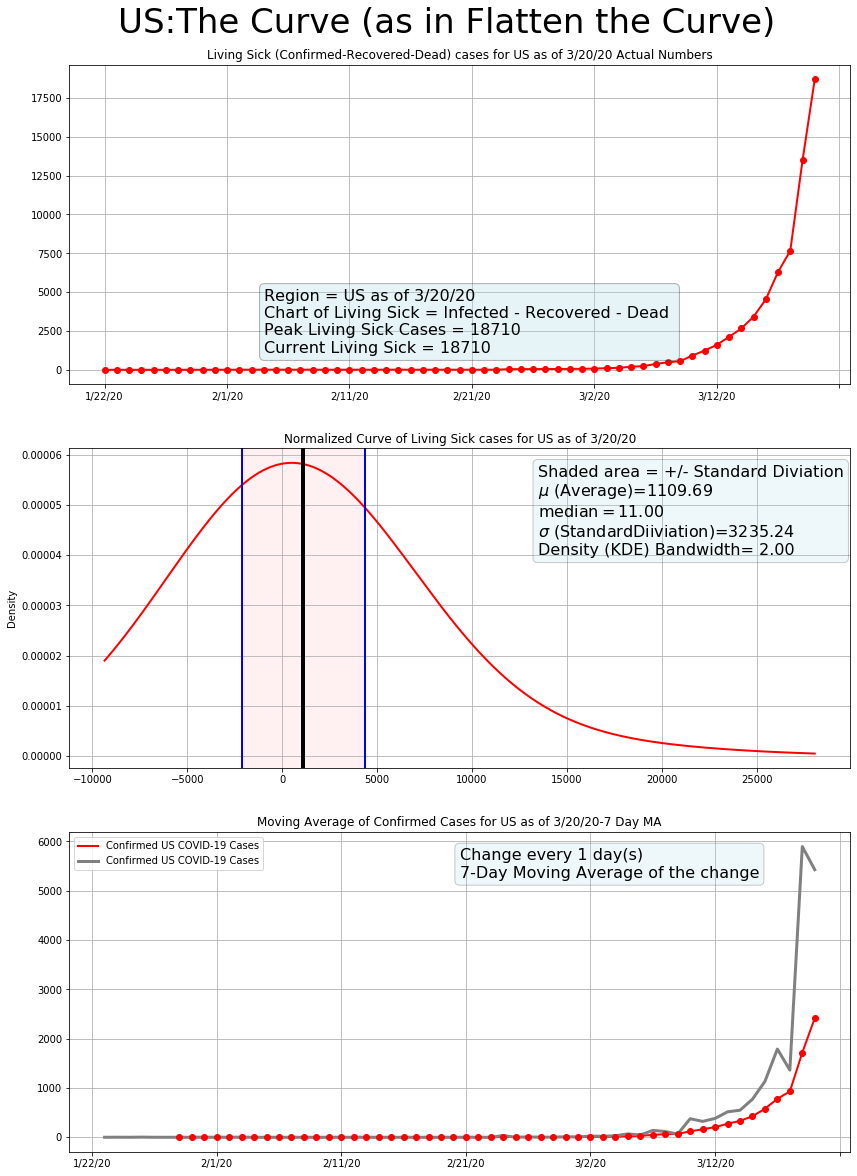

In [12]:
## The Curve
TheCurve_df = us_df_cumulative[colname] - us_df_recovered_cum[colname_recovered] - us_df_deaths_cum[colname_deaths]

fig, ax = plt.subplots(3,1,figsize=(14,20))

#us_df_cumulative_no0 = us_df_cumulative[colname].diff(1).copy(deep=True)
TheCurve_df.plot(ax=ax[0],c='red', lw=2,
                 title='Living Sick (Confirmed-Recovered-Dead) cases for '+region+' as of '+str(us_df_cumulative.index[-1])+' Actual Numbers')
ax[0].plot(TheCurve_df,'o',c='red',lw=8)
ax[0].grid(True,which="both")

peak = TheCurve_df.max()
last_sick = TheCurve_df[-1]

textstr = '\n'.join((
        r'Region = %s as of %s' % (region, str(us_df_cumulative.index[-1]),),
        r'Chart of Living Sick = Infected - Recovered - Dead ',
        r'Peak Living Sick Cases = %.0f' % (peak, ),
        r'Current Living Sick = %.0f' % (last_sick, )))

props = dict(boxstyle='round', facecolor='lightblue', alpha=0.3)
_=ax[0].text(0.25, 0.3, textstr, transform=ax[0].transAxes, fontsize=16, fontfamily='sans-serif',
        verticalalignment='top', bbox=props)

## Plot the normal Probability Density Function (PDF) curve
kde_bandwidth = 2.0
TheCurve_df.plot.kde(bw_method=kde_bandwidth,ax=ax[1],c='red', lw=2,
                     title='Normalized Curve of Living Sick cases for '+region+' as of '+str(us_df_cumulative.index[-1])+'')
ax[1].grid(True,which="both")

std_div = TheCurve_df.std()
median = TheCurve_df.median()
mean = TheCurve_df.mean()

ax[1].axvline(mean,lw=4,c='black')
ax[1].axvline(mean-std_div,lw=2,c='blue')
ax[1].axvline(mean+std_div,lw=2,c='blue')
ax[1].axvspan(mean-std_div,mean+std_div,color='lightpink',alpha=.2)

textstr = '\n'.join((
    r'Shaded area = +/- Standard Diviation',
    r'$\mu$ (Average)=%.2f' % (mean, ),
    r'$\mathrm{median}=%.2f$' % (median, ),
    r'$\sigma$ (StandardDiiviation)=%.2f' % (std_div, ),
    r'Density (KDE) Bandwidth= %.2f' % (kde_bandwidth)))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.2)

# place a text box in upper left in axes coords
_=ax[1].text(0.6, 0.95, textstr, transform=ax[1].transAxes, fontsize=16, fontfamily='sans-serif',
        verticalalignment='top', bbox=props)


plt.suptitle(region +':The Curve (as in Flatten the Curve)', fontsize=34,y=0.92)

ChangePeriod = 1
MAperiod = 7
TheCurve_df['MA'] = us_df_cumulative[colname].diff(ChangePeriod).rolling(window=MAperiod).mean() ##TheCurve_df.diff(1) ## .rolling(window=period).mean()
TheCurve_df['MA'].plot(ax=ax[2],c='red', lw=2,
                 title='Moving Average of Confirmed Cases for '+region+' as of '+str(us_df_cumulative.index[-1])+'-'+str(MAperiod) +' Day MA')
us_df_cumulative[colname].diff(ChangePeriod).plot(ax=ax[2],c='gray',lw=3)
ax[2].legend()

ax[2].plot(TheCurve_df['MA'],'o',c='red',lw=8)
ax[2].grid(True,which="both")


textstr = '\n'.join((
    r'Change every '+str(ChangePeriod)+' day(s)',
    r''+str(MAperiod)+'-Day Moving Average of the change'))
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.2)
_=ax[2].text(0.5, 0.95, textstr, transform=ax[2].transAxes, fontsize=16, fontfamily='sans-serif',
        verticalalignment='top', bbox=props)


plt.show()

## Calculate R-naught 

### Form more info on R-naught, check https://en.wikipedia.org/wiki/Basic_reproduction_number

In [5]:
## ASSUMPTION:
##    1) In early stages of contagion, there is NO limiting factor for the spreading of virus
##    2) Uninficted Population is very close to total population
##    3) Assume Free movement (No lockdowns) of individuals in and out of areas affected by virus
##

## Find Last day's total cases
TotalCasesToDate = us_df_cumulative[colname][-1:][0]

## Create a new Series that calculates the difference from day to day

ChangeFromDay2Next = us_df_cumulative[colname].diff(1)
us_df_cumulative[colname] = us_df_cumulative[us_df_cumulative[colname] > 0].copy(deep=True)
us_df_cumulative[colname] = us_df_cumulative[colname].dropna()
ChangeFromDay2NextPercent = us_df_cumulative[colname].pct_change(1)

## Find the Average change from day to day
AverageChangeFromDay2Next = ChangeFromDay2Next.mean()

## Create a series of R0 by calculating the ratio of one day to the day before
r0 = [] # Will record the ratio day to day, start from day 1 to last day
for day in range(1,len(ChangeFromDay2Next)):
    if(ChangeFromDay2Next[day-1:][0] == 0): # Avoid dividing by zero
        r0.append(0)
    else:
        r0.append(ChangeFromDay2Next[day:][0]/ChangeFromDay2Next[day-1:][0] )  

## Look back 20 days only. This is the most relevant data        
GoBackDays = 20
dict0 = {'Date' : us_df_cumulative.index[-GoBackDays:].values, 'R-Naught' : r0[-GoBackDays:]}
R_Naught= pd.DataFrame(dict0)    
R_Naught = R_Naught.set_index('Date')

#print('ChangeFromDay2Next' , ChangeFromDay2Next[-1:][0])
DailyDelta = ChangeFromDay2Next[-1:][0]

#print(us_df_cumulative['Actual USA COVID-19 Cases'][-2:][0])
DailyDeltaPercent = 100 * DailyDelta /us_df_cumulative[colname][-2:][0]

## Descriptive Summary

In [6]:
print('-- This is for region :', region)
print("-- Total cases as of " +str(us_df_cumulative.index[-1:][0]) + "(End of day) is "+str(TotalCasesToDate),
      'cases' )
print("-- Average case count change from one day to next = ", np.round(AverageChangeFromDay2Next,2),' cases')

print("-- Change in "+region+" confirmed COVID-19 cases FROM",
      str(us_df_cumulative.index[-2:][0]), "TO", 
      str(us_df_cumulative.index[-1:][0])+ "(End of day) is " + str(int(DailyDelta)),'cases',
      "OR " +str(np.round(DailyDeltaPercent,2)) + '% from previous case total. ', '\n-- This is', 
      np.round((DailyDelta/AverageChangeFromDay2Next),2) ,
      'Times the Average count in daily changes. \n-- The current Average PERCENT(%) change from day to day is' , 
      str(np.round(100*ChangeFromDay2NextPercent.mean(),2) )+'%'+' from previous case total.', 
      "This means it's Above or Below (if negative) the average daily % change by "+ str(np.round(100*ChangeFromDay2NextPercent.mean(),2) )+'%')
print("-- R-naught value as of end-of-day",str(us_df_cumulative.index[-1:][0]), 'IS', 
      np.round(R_Naught['R-Naught'][-1:][0],4) )
print('-- The average R-naught from the past',GoBackDays,'days is', np.round( R_Naught['R-Naught'].mean(),4))

-- This is for region : US
-- Total cases as of 3/20/20(End of day) is 19101.0 cases
-- Average case count change from one day to next =  329.31  cases
-- Change in US confirmed COVID-19 cases FROM 3/19/20 TO 3/20/20(End of day) is 5424 cases OR 39.66% from previous case total.  
-- This is 16.47 Times the Average count in daily changes. 
-- The current Average PERCENT(%) change from day to day is 22.66% from previous case total. This means it's Above or Below (if negative) the average daily % change by 22.66%
-- R-naught value as of end-of-day 3/20/20 IS 0.9203
-- The average R-naught from the past 20 days is 1.7597


## Plot R-naught as a Time Series

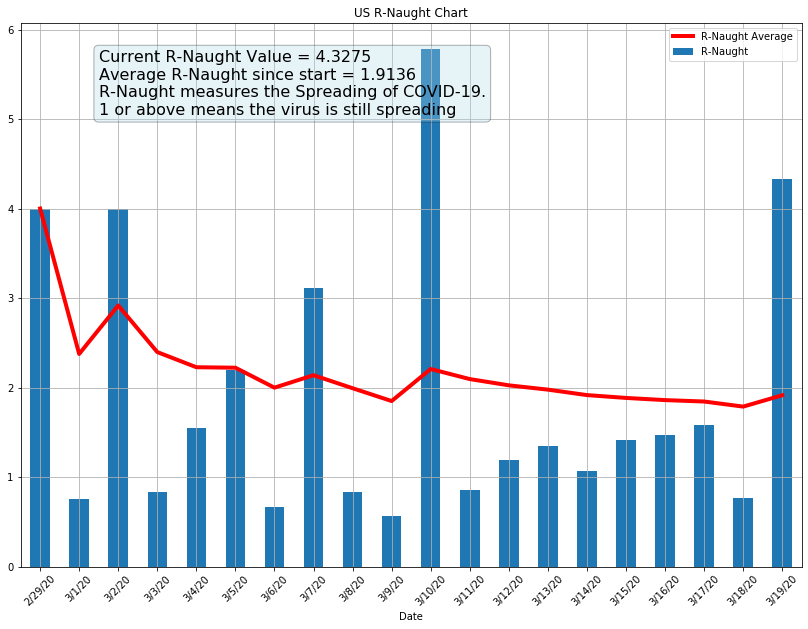

In [293]:
fig, ax = plt.subplots(figsize=(14,10))
ax.grid(True)
R_Naught['R-Naught'].plot(ax=ax,kind='bar',title=region+' R-Naught Chart')
R_Naught['R-Naught Average'] = R_Naught.expanding().mean()
R_Naught['R-Naught Average'].plot(ax=ax,c='r',grid=True,lw=4)
ax.legend()

textstr = '\n'.join((
        r'Current R-Naught Value = %.4f' % (R_Naught['R-Naught'][-1:][0], ),
        r'Average R-Naught since start = %.4f' % (R_Naught['R-Naught Average'][-1:][0],),
        r'R-Naught measures the Spreading of COVID-19.',
        r'1 or above means the virus is still spreading'))

props = dict(boxstyle='round', facecolor='lightblue', alpha=0.3)
ax.text(0.1, 0.95, textstr, transform=ax.transAxes, fontsize=16,
        verticalalignment='top', bbox=props, fontfamily = 'sans-serif')

_ = plt.xticks(rotation=45)


### It's plausible to assume that US officials hit the panic button at the end of 3/10/2020 when R-naught spiked to near 6. R-naught should not be allowed to exceed 1.0 for the spread to die down